In [1]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# check the tensorflow version and the number of available GPUs
print('Tensorflow Version: ' + tf.__version__)
physical_devices = tf.config.list_physical_devices('CPU')
print("Num GPUs:", len(physical_devices))

Tensorflow Version: 2.10.0
Num GPUs: 1


In [2]:
import pyodbc
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import datetime
from datetime import date, timedelta

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)

# SQLAlchemy connectable erstellen
engine = create_engine('mssql+pyodbc://', creator=lambda: cnxn)

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2020-07-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2023-07-01"  # Enddatum, bis zu dem Daten überprüft werden sollen
company_name = "GOOG"  # nur AAPL, MSFT oder GOOG möglich // Name des Unternehmens, für das Daten geladen werden sollen

# Daten aus der Tabelle für das bestimmte Unternehmen in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE date >= ? AND date <= ? AND Company = ?"
data = pd.read_sql(select_query, con=engine, params=(start_date, end_date, company_name))

# added
data["ID"] = data.index
data = data[["Date", "Company", "Type", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

# Verbindung schließen
cnxn.close()

# DataFrame anzeigen
print(data.tail())


          Date Company Type        Open        High         Low       Close  \
750 2023-06-26    GOOG  ACT  121.466003  122.720001  118.989998  119.089996   
751 2023-06-27    GOOG  ACT  117.839996  119.894997  116.910004  119.010002   
752 2023-06-28    GOOG  ACT  117.959999  121.269997  117.599998  121.080002   
753 2023-06-29    GOOG  ACT  120.089996  120.910004  119.209999  120.010002   
754 2023-06-30    GOOG  ACT  121.099998  122.029999  120.879997  120.970001   

       Volume  
750  23185000  
751  27221700  
752  19753100  
753  18517500  
754  23865800  


In [3]:
df = data

In [4]:
df.drop("Company", axis=1, inplace=True)
df.drop("Type", axis=1, inplace=True)
df.set_index("Date", inplace=True)

In [5]:
df


,Open,High,Low,Close,Volume
Date,,,,,
2020-07-01,70.555000,72.150002,70.490997,71.902000,35504000
2020-07-02,72.347000,74.147499,72.320999,73.235001,37182000
2020-07-06,74.002998,75.329498,73.642998,74.785004,31280000
2020-07-07,74.500000,75.839996,74.177498,74.259003,29164000
2020-07-08,74.716003,75.293999,74.281502,74.800003,24994000
...,...,...,...,...,...
2023-06-26,121.466003,122.720001,118.989998,119.089996,23185000
2023-06-27,117.839996,119.894997,116.910004,119.010002,27221700
2023-06-28,117.959999,121.269997,117.599998,121.080002,19753100


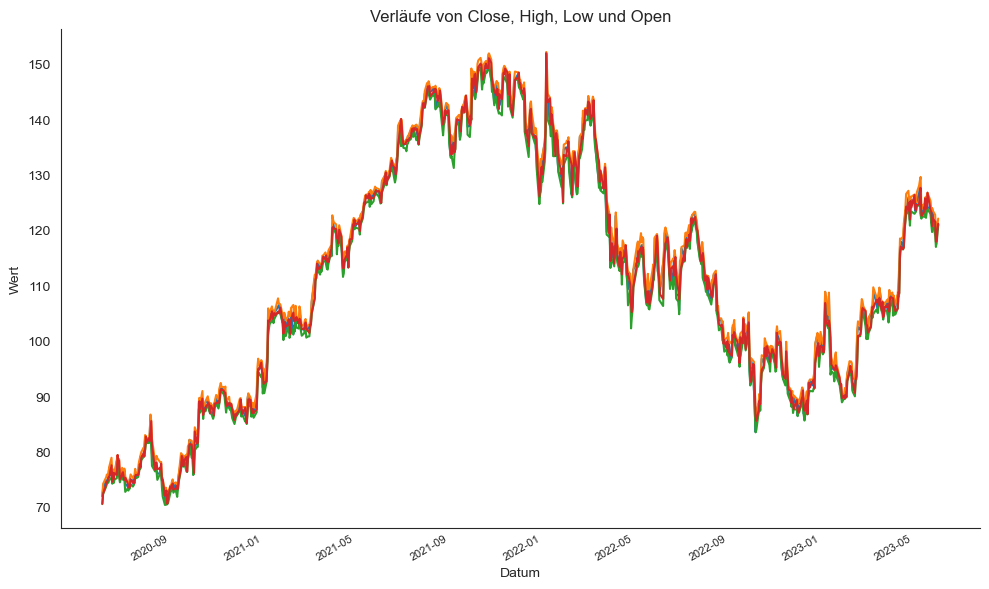

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Annahme: df ist der DataFrame, der die Daten enthält

# Auswahl der gewünschten Spalten
df_plot = df[['Close', 'High', 'Low', 'Open']].copy()

# Plot Line Chart
fig, ax = plt.subplots(figsize=(10, 6))
for column in df_plot.columns:
    sns.lineplot(data=df_plot[column], ax=ax)

ax.set_xlabel('Datum')
ax.set_ylabel('Wert')
ax.set_title('Verläufe von Close, High, Low und Open')

ax.tick_params(axis="x", rotation=30, labelsize=8, length=0)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()


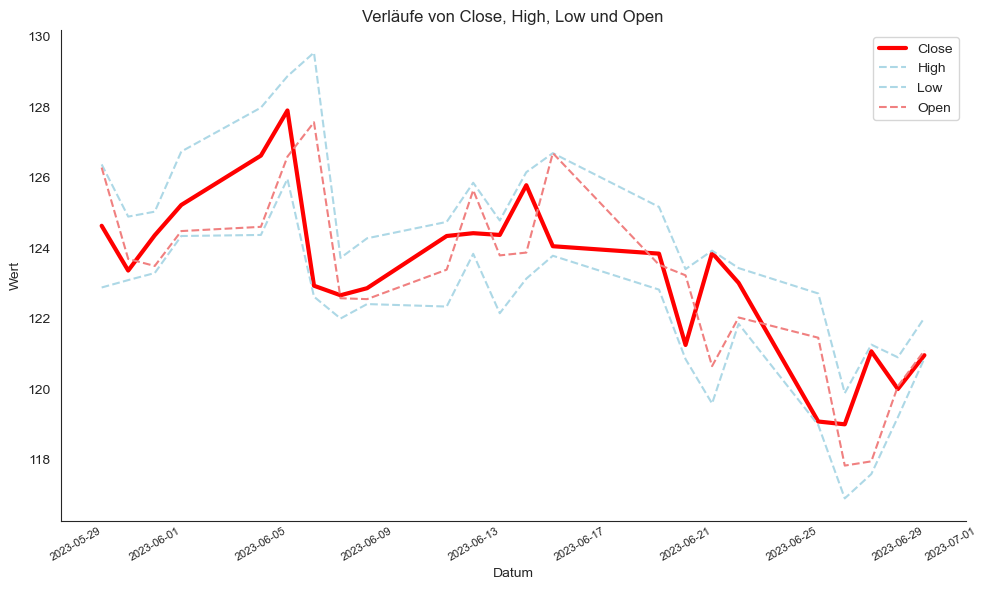

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Annahme: df ist der DataFrame, der die Daten enthält

# Filtern des DataFrame auf den letzten Monat
df_last_month = df.loc[df.index >= df.index.max() - pd.DateOffset(months=1)]

# Auswahl der gewünschten Spalten
df_plot = df_last_month[['Close', 'High', 'Low', 'Open']].copy()

# Plot Line Chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_plot['Close'], ax=ax, color='red', linewidth=3, label='Close')
sns.lineplot(data=df_plot['High'], ax=ax, color='lightblue', linewidth=1.5, linestyle='dashed', label='High')
sns.lineplot(data=df_plot['Low'], ax=ax, color='lightblue', linewidth=1.5, linestyle='dashed', label='Low')
sns.lineplot(data=df_plot['Open'], ax=ax, color='lightcoral', linewidth=1.5, linestyle='dashed', label='Open')

ax.set_xlabel('Datum')
ax.set_ylabel('Wert')
ax.set_title('Verläufe von Close, High, Low und Open')

ax.tick_params(axis="x", rotation=30, labelsize=8, length=0)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.legend()
plt.show()


In [8]:
# Indexing Batches
train_df = df.sort_values(by=['Date']).copy()

# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close', 'Volume'
            #, 'Month', 'Year', 'Adj Close'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close', 'Volume']


,High,Low,Open,Close,Volume,Prediction
Date,,,,,,
2023-06-26,122.720001,118.989998,121.466003,119.089996,23185000,119.089996
2023-06-27,119.894997,116.910004,117.839996,119.010002,27221700,119.010002
2023-06-28,121.269997,117.599998,117.959999,121.080002,19753100,121.080002
2023-06-29,120.910004,119.209999,120.089996,120.010002,18517500,120.010002
2023-06-30,122.029999,120.879997,121.099998,120.970001,23865800,120.970001


In [9]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(755, 5)


In [10]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(554, 50, 5) (554,)
(151, 50, 5) (151,)
0.06598629068967399
0.06598629068967399


In [11]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
np_data_columns = data.columns.tolist()
index_Close = np_data_columns.index("Close")

# Split the training data into train and test data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) # contains sequence_length values 0-sequence_length * columns
        y.append(data[i, index_Close]) # contains the prediction values for validation, for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])


(554, 50, 5) (554,)
(151, 50, 5) (151,)
0.06598629068967399
0.06598629068967399


In [12]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

250 50 5


In [13]:
# Training the model
epochs = 10
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/10
35/35 [==============================] - 21s 485ms/step - loss: 0.0268 - val_loss: 0.0023
Epoch 2/10
35/35 [==============================] - 17s 475ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 3/10
35/35 [==============================] - 15s 430ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 4/10
35/35 [==============================] - 15s 422ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 5/10
35/35 [==============================] - 16s 462ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/10
35/35 [==============================] - 16s 454ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/10
35/35 [==============================] - 15s 437ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/10
35/35 [==============================] - 16s 454ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/10
35/35 [==============================] - 16s 449ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 10/10
35/35 [==============================] - 15s 416ms/step - loss: 0.0022 - val_lo

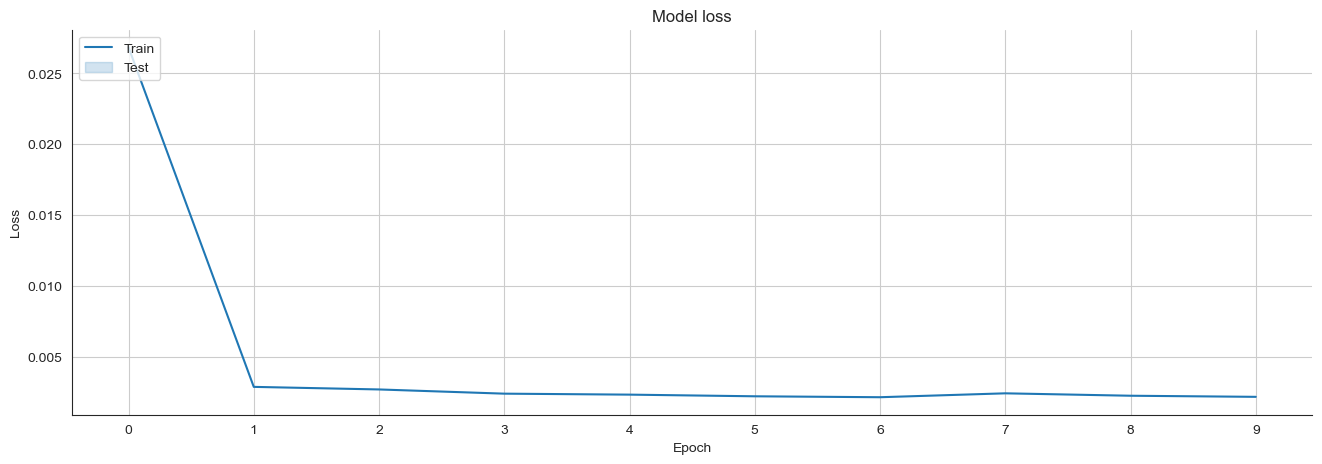

In [14]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [15]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

5/5 [==============================] - 1s 24ms/step
Median Absolute Error (MAE): 2.55
Mean Absolute Percentage Error (MAPE): 2.48 %
Median Absolute Percentage Error (MDAPE): 1.92 %


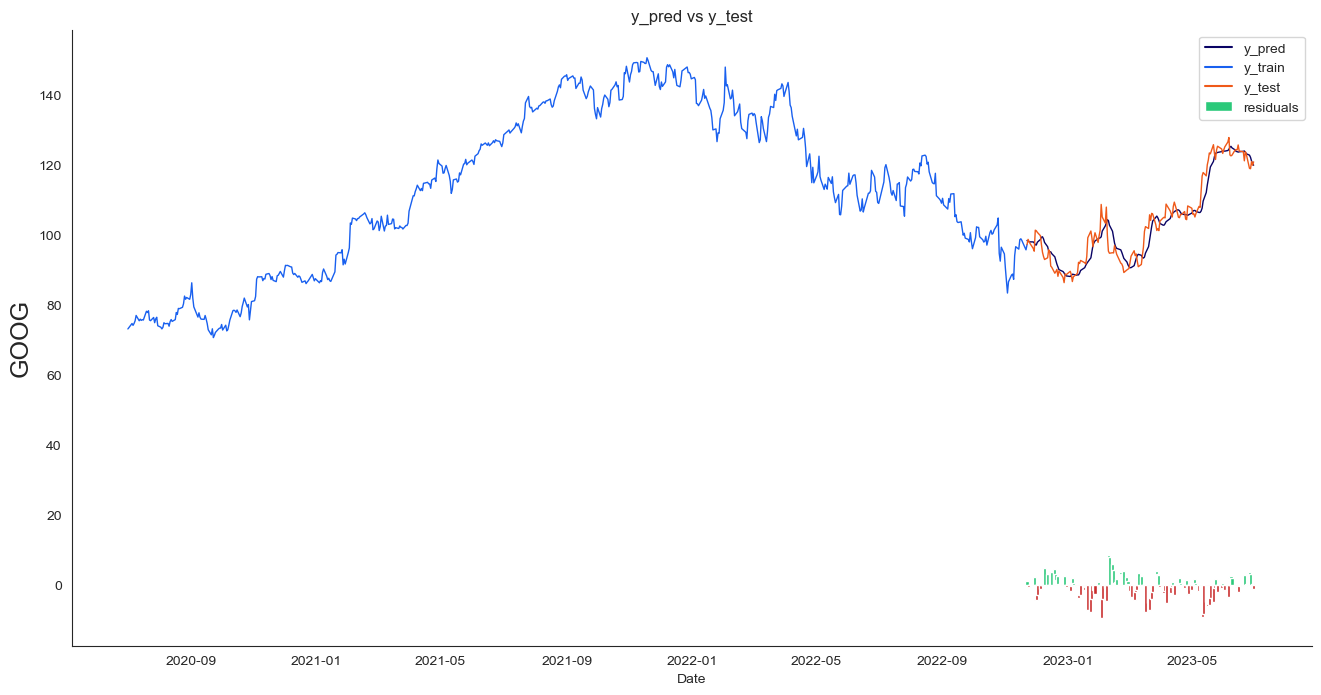

In [16]:
# The date from which on the date is displayed
display_start_date = start_date 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(company_name, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

In [17]:
df_temp = df[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for {company_name} at {end_date} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

1/1 [==============================] - 0s 20ms/step
The close price for GOOG at 2023-07-01 was 120.97
The predicted close price is 119.9800033569336 (-0.83%)


In [18]:
# Anzahl der nächsten Tage, die vorhergesagt werden sollen
num_days = 30

# Vorhersage für jeden Tag treffen und zum DataFrame hinzufügen
for _ in range(num_days):
    # Aktuelle letzten N Tage abrufen und skalieren
    last_N_days = new_df[-sequence_length:].values
    last_N_days_scaled = scaler.transform(last_N_days)
    
    # Leere Liste erstellen und vergangene N Tage hinzufügen
    X_test_new = []
    X_test_new.append(last_N_days_scaled)
    
    # X_test in ein Numpy-Array umwandeln und Daten umformen
    pred_price_scaled = model.predict(np.array(X_test_new))
    pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))
    
    # Vorhersage der nächsten 30 Tage speichern
    predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
    
    # Datum für den nächsten Tag berechnen
    next_day = new_df.index[-1] + pd.DateOffset(days=1)
    
    # Vorhersage zum DataFrame hinzufügen
    df.loc[next_day, 'Predicted Price'] = predicted_price
    
    # Neuen Tag zum new_df DataFrame hinzufügen
    new_df.loc[next_day] = predicted_price
    
    # Aktuellen Tag aus dem DataFrame entfernen
    new_df = new_df[1:]

1/1 [==============================] - 0s 30ms/step


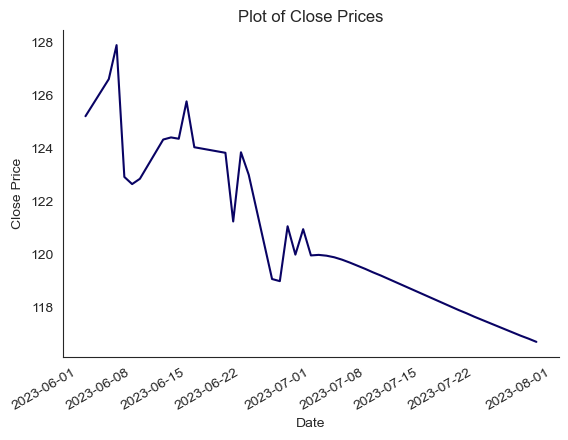

In [19]:
import matplotlib.pyplot as plt

# Plotting the "Close" column
new_df["Close"].plot()

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Plot of Close Prices")

# Displaying the plot
plt.show()


In [20]:
df_extended_new = new_df

In [21]:
start_date_from = end_date  # Replace with your desired start date

# Set values to NaN
df_extended_new.loc[start_date_from:, ["Open", "High", "Low", "Volume"]] = np.nan

In [22]:
start_date_from

'2023-07-01'

In [23]:
data_extended_key = df_extended_new

In [24]:
data_extended_key['Date'] = data_extended_key.index


In [25]:
import numpy as np

# Key einbinden
#company = data.loc[0]['Company']
data_extended_key['Company'] = company_name
data_extended_key['Type'] = data_extended_key['High'].apply(lambda x: f'LSTM_{company_name}' if np.isnan(x) else f'Act_{company_name}')
data_extended_key.loc[data_extended_key['Type'].str.contains('LSTM'), 'Forecast_Date'] = end_date
data_extended_key['Key'] = data_extended_key['Company'] + '_' + data_extended_key['Date'].astype(str) + '_' + data_extended_key['Type']


In [26]:
#data_extended_key.drop("Predicted Price", axis=1, inplace=True)

In [27]:
data_extended_key = data_extended_key[~data_extended_key["Type"].str.contains("Act_")]

In [28]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import warnings

# Deaktivieren der Pandas-Warnungen
warnings.filterwarnings('ignore', category=UserWarning)

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)

# SQLAlchemy connectable erstellen
engine = create_engine('mssql+pyodbc://', creator=lambda: cnxn)

# Query erstellen, um alle Daten auszulesen
query = "SELECT * FROM stock_data_forecast WHERE [TYPE] LIKE 'LSTM_%'"

# Ausführen der Query und Laden der Ergebnisse in einen DataFrame
exists_df = pd.read_sql(query, cnxn)

# added
exists_df = exists_df.astype(data_extended_key.dtypes)
exists_df = exists_df.reindex(columns=data_extended_key.columns)

# Key einbinden
exists_df['Key'] = exists_df['Company'] + '_' + exists_df['Date'].astype(str) + '_' + exists_df['Type']

In [29]:
# added
exists_df = exists_df.astype(data_extended_key.dtypes)
exists_df = exists_df.reindex(columns=data_extended_key.columns)

In [30]:
# Zusammenführen der beiden DataFrames
combined_df = pd.concat([data_extended_key, exists_df])

In [31]:
# Entfernen von Duplikaten
combined_df = combined_df.drop_duplicates(subset=['Key'], keep=False)

In [32]:
# Schreiben des aktualisierten DataFrames in die SQL Server-Tabelle
combined_df.to_sql('stock_data_forecast', con=engine, if_exists='append', index=False)

# Anzahl der geschriebenen Zeilen erhalten
num_written_rows = combined_df.shape[0]
print(f"Es wurden {num_written_rows} Zeilen erfolgreich übertragen.")

exists_df = pd.read_sql('SELECT * FROM stock_data_forecast', cnxn)
exists_df.drop_duplicates(subset='Key', inplace=True)

# Verbindung schließen
cnxn.close()
print(f"Die Verbindung ist wieder geschlossen.")

Es wurden 90 Zeilen erfolgreich übertragen.
Die Verbindung ist wieder geschlossen.


In [33]:
combined_df

,High,Low,Open,Close,Volume,Date,Company,Type,Forecast_Date,Key
2023-07-02 00:00:00,NaN,NaN,NaN,120.000000,NaN,2023-07-02,GOOG,LSTM_GOOG,2023-07-01,GOOG_2023-07-02_LSTM_GOOG
2023-07-03 00:00:00,NaN,NaN,NaN,119.970001,NaN,2023-07-03,GOOG,LSTM_GOOG,2023-07-01,GOOG_2023-07-03_LSTM_GOOG
2023-07-04 00:00:00,NaN,NaN,NaN,119.910004,NaN,2023-07-04,GOOG,LSTM_GOOG,2023-07-01,GOOG_2023-07-04_LSTM_GOOG
2023-07-05 00:00:00,NaN,NaN,NaN,119.820000,NaN,2023-07-05,GOOG,LSTM_GOOG,2023-07-01,GOOG_2023-07-05_LSTM_GOOG
2023-07-06 00:00:00,NaN,NaN,NaN,119.709999,NaN,2023-07-06,GOOG,LSTM_GOOG,2023-07-01,GOOG_2023-07-06_LSTM_GOOG
...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,104.529999,NaN,2023-05-20,GOOG,LSTM_GOOG,2023-05-01,GOOG_2023-05-20_LSTM_GOOG
58,NaN,NaN,NaN,103.919998,NaN,2023-05-27,GOOG,LSTM_GOOG,2023-05-01,GOOG_2023-05-27_LSTM_GOOG
59,NaN,NaN,NaN,103.750000,NaN,2023-05-29,GOOG,LSTM_GOOG,2023-05-01,GOOG_2023-05-29_LSTM_GOOG
60,NaN,NaN,NaN,103.669998,NaN,2023-05-30,GOOG,LSTM_GOOG,2023-05-01,GOOG_2023-05-30_LSTM_GOOG
